## Importing the relevant libraries

In [1]:
pip install symspellpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk, warnings, string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from symspellpy import Verbosity, SymSpell
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

## Loading the dataset

In [4]:
df = pd.read_csv('../input/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.shape

(162980, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


## Text Preprocessing

In [7]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

In [10]:
def text_preprocess(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english') and not word.isdigit()])

In [11]:
df.clean_text = df.clean_text.apply(text_preprocess)

In [12]:
stemmer = SnowballStemmer('english')

def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [13]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [14]:
symspell = SymSpell()

def spelling_correction(text):
    correct_spellings = []
    for token in text.split():
        x = symspell.lookup(token,Verbosity.CLOSEST,max_edit_distance=2,include_unknown=True)[0].__str__()
        y = x.split(',')[0]
        correct_spellings.append(y)
    return ' '.join(correct_spellings)

In [15]:
df.clean_text = df.clean_text.apply(stem_words)
df.clean_text = df.clean_text.apply(lemmatize_words)
df.clean_text = df.clean_text.apply(spelling_correction)

In [16]:
df.loc[df.clean_text.str.isspace()]

,clean_text,category


In [17]:
df.category.replace([-1.0,0.0,1.0],['Negative','Neutral','Positive'],inplace=True)

## Exploratory Data Analysis

<AxesSubplot:xlabel='category', ylabel='count'>

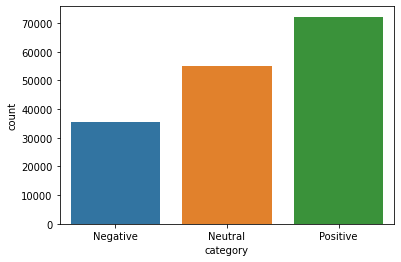

In [18]:
sns.countplot(df.category)

In [19]:
positive_tweets = ' '.join(list(df[df.category == 'Positive']['clean_text']))
negative_tweets = ' '.join(list(df[df.category == 'Negative']['clean_text']))
neutral_tweets = ' '.join(list(df[df.category == 'Neutral']['clean_text']))

In [20]:
def create_word_cloud(data):
    data_wc = WordCloud(width=600,height=512).generate(data)
    plt.figure(figsize=(13,9))
    plt.imshow(data_wc)
    plt.show()

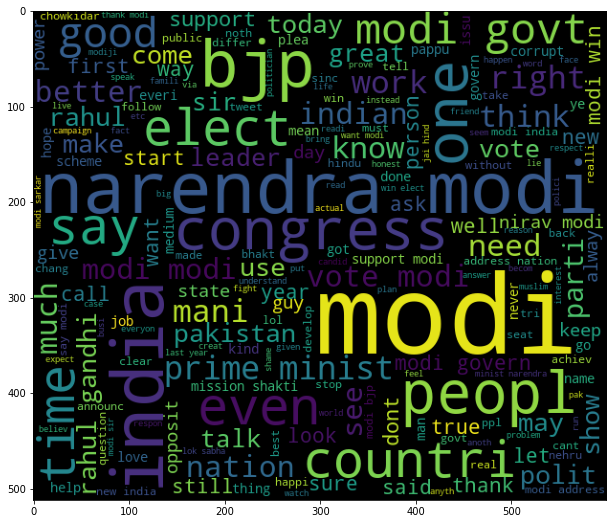

In [21]:
create_word_cloud(positive_tweets)

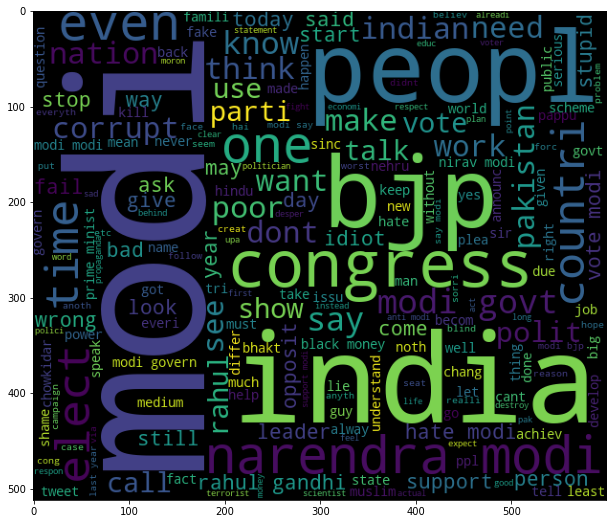

In [22]:
create_word_cloud(negative_tweets)

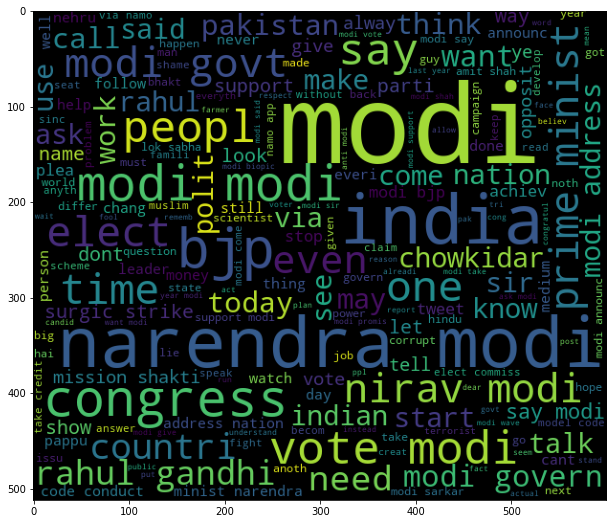

In [23]:
create_word_cloud(neutral_tweets)

## Dividing the dataset into training and test sets

In [24]:
X = df.clean_text
y = df.category

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Text Vectorization 

In [26]:
tfidf = TfidfVectorizer()
X_train_vect = tfidf.fit_transform(X_train)
X_test_vect = tfidf.transform(X_test)

In [27]:
tfidf.vocabulary_

{'modi': 39364,
 'croni': 15580,
 'capitalist': 11323,
 'friend': 23046,
 'given': 24320,
 'lac': 34411,
 'bpl': 10212,
 'familiesit': 21570,
 'histor': 27392,
 'pocket': 47459,
 'still': 58143,
 'rahul': 50086,
 'gandhi': 23555,
 'atleast': 6111,
 'talk': 59679,
 'bout': 10188,
 'peopl': 46260,
 'india': 29040,
 'pakistan': 45153,
 'dont': 18701,
 'data': 16252,
 'back': 6768,
 'question': 49747,
 'narendra': 41719,
 'unemploy': 63434,
 'tune': 62698,
 'watch': 65856,
 'nirav': 42806,
 'made': 36539,
 'death': 16474,
 'threat': 61330,
 'wit': 66670,
 'court': 15256,
 'told': 61896,
 'time': 61535,
 'get': 24023,
 'nagpur': 41397,
 'jail': 30775,
 'maharashtra': 36772,
 'state': 57949,
 'along': 4146,
 'choksi': 12871,
 'dawood': 16314,
 'abrahim': 2569,
 'zakar': 68083,
 'naik': 41445,
 'vajay': 64400,
 'malaya': 37011,
 'bust': 10891,
 'nake': 41480,
 'insid': 29721,
 'break': 10326,
 'promis': 48944,
 'orop': 44513,
 'deliv': 16903,
 'farm': 21702,
 'waiver': 65617,
 'univers': 6359

In [28]:
len(tfidf.vocabulary_)

68494

## Model Training & Evaluation

In [29]:
accuracy_scores = {}

In [30]:
mnb = MultinomialNB()
mnb.fit(X_train_vect,y_train)

MultinomialNB()

In [31]:
mnb_pred = mnb.predict(X_test_vect)
print(confusion_matrix(y_test,mnb_pred))
print(classification_report(y_test,mnb_pred))
accuracy_scores['MNB'] = accuracy_score(y_test,mnb_pred)

[[ 1133   467  9091]
 [   69  5164 11411]
 [   47   494 21015]]
              precision    recall  f1-score   support

    Negative       0.91      0.11      0.19     10691
     Neutral       0.84      0.31      0.45     16644
    Positive       0.51      0.97      0.67     21556

    accuracy                           0.56     48891
   macro avg       0.75      0.46      0.44     48891
weighted avg       0.71      0.56      0.49     48891



In [32]:
lr = LogisticRegression()
lr.fit(X_train_vect,y_train)

LogisticRegression()

In [33]:
lr_pred = lr.predict(X_test_vect)
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
accuracy_scores['LR'] = accuracy_score(y_test,lr_pred)

[[ 7573  1438  1680]
 [  494 15058  1092]
 [ 1136  1921 18499]]
              precision    recall  f1-score   support

    Negative       0.82      0.71      0.76     10691
     Neutral       0.82      0.90      0.86     16644
    Positive       0.87      0.86      0.86     21556

    accuracy                           0.84     48891
   macro avg       0.84      0.82      0.83     48891
weighted avg       0.84      0.84      0.84     48891



In [34]:
rf = RandomForestClassifier()
rf.fit(X_train_vect,y_train)

RandomForestClassifier()

In [35]:
rf_pred = rf.predict(X_test_vect)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
accuracy_scores['RFC'] = accuracy_score(y_test,rf_pred)

[[ 5749  1519  3423]
 [  253 14518  1873]
 [  605  1842 19109]]
              precision    recall  f1-score   support

    Negative       0.87      0.54      0.66     10691
     Neutral       0.81      0.87      0.84     16644
    Positive       0.78      0.89      0.83     21556

    accuracy                           0.81     48891
   macro avg       0.82      0.77      0.78     48891
weighted avg       0.81      0.81      0.80     48891



In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train_vect,y_train)

DecisionTreeClassifier()

In [37]:
dt_pred = dt.predict(X_test_vect)
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
accuracy_scores['DT'] = accuracy_score(y_test,dt_pred)

[[ 6728  1397  2566]
 [  985 13841  1818]
 [ 2155  2045 17356]]
              precision    recall  f1-score   support

    Negative       0.68      0.63      0.65     10691
     Neutral       0.80      0.83      0.82     16644
    Positive       0.80      0.81      0.80     21556

    accuracy                           0.78     48891
   macro avg       0.76      0.76      0.76     48891
weighted avg       0.77      0.78      0.77     48891



In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train_vect,y_train)

KNeighborsClassifier()

In [39]:
knn_pred = knn.predict(X_test_vect)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
accuracy_scores['KNN'] = accuracy_score(y_test,knn_pred)

[[ 1013  9581    97]
 [  109 16161   374]
 [  217 18323  3016]]
              precision    recall  f1-score   support

    Negative       0.76      0.09      0.17     10691
     Neutral       0.37      0.97      0.53     16644
    Positive       0.86      0.14      0.24     21556

    accuracy                           0.41     48891
   macro avg       0.66      0.40      0.31     48891
weighted avg       0.67      0.41      0.32     48891



In [40]:
lsvm = LinearSVC()
lsvm.fit(X_train_vect,y_train)

LinearSVC()

In [41]:
lsvm_pred = lsvm.predict(X_test_vect)
print(confusion_matrix(y_test,lsvm_pred))
print(classification_report(y_test,lsvm_pred))
accuracy_scores['LSVM'] = accuracy_score(y_test,lsvm_pred)

[[ 7917  1214  1560]
 [  595 14965  1084]
 [ 1215  1888 18453]]
              precision    recall  f1-score   support

    Negative       0.81      0.74      0.78     10691
     Neutral       0.83      0.90      0.86     16644
    Positive       0.87      0.86      0.87     21556

    accuracy                           0.85     48891
   macro avg       0.84      0.83      0.83     48891
weighted avg       0.85      0.85      0.84     48891



In [42]:
et = ExtraTreesClassifier()
et.fit(X_train_vect,y_train)

ExtraTreesClassifier()

In [43]:
et_pred = et.predict(X_test_vect)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))
accuracy_scores['ET'] = accuracy_score(y_test,et_pred)

[[ 5930  1392  3369]
 [  239 14692  1713]
 [  601  1698 19257]]
              precision    recall  f1-score   support

    Negative       0.88      0.55      0.68     10691
     Neutral       0.83      0.88      0.85     16644
    Positive       0.79      0.89      0.84     21556

    accuracy                           0.82     48891
   macro avg       0.83      0.78      0.79     48891
weighted avg       0.82      0.82      0.81     48891



In [44]:
bag = BaggingClassifier()
bag.fit(X_train_vect,y_train)

BaggingClassifier()

In [45]:
bag_pred = bag.predict(X_test_vect)
print(confusion_matrix(y_test,bag_pred))
print(classification_report(y_test,bag_pred))
accuracy_scores['BAG'] = accuracy_score(y_test,bag_pred)

[[ 7098  1440  2153]
 [  650 14947  1047]
 [ 1612  2165 17779]]
              precision    recall  f1-score   support

    Negative       0.76      0.66      0.71     10691
     Neutral       0.81      0.90      0.85     16644
    Positive       0.85      0.82      0.84     21556

    accuracy                           0.81     48891
   macro avg       0.80      0.80      0.80     48891
weighted avg       0.81      0.81      0.81     48891



In [46]:
lgbm = LGBMClassifier()
lgbm.fit(X_train_vect,y_train)

LGBMClassifier()

In [47]:
lgbm_pred = lgbm.predict(X_test_vect)
print(confusion_matrix(y_test,lgbm_pred))
print(classification_report(y_test,lgbm_pred))
accuracy_scores['LGBM'] = accuracy_score(y_test,lgbm_pred)

[[ 7288  1886  1517]
 [  341 15575   728]
 [ 1085  2498 17973]]
              precision    recall  f1-score   support

    Negative       0.84      0.68      0.75     10691
     Neutral       0.78      0.94      0.85     16644
    Positive       0.89      0.83      0.86     21556

    accuracy                           0.84     48891
   macro avg       0.84      0.82      0.82     48891
weighted avg       0.84      0.84      0.83     48891



In [48]:
cat = CatBoostClassifier()
cat.fit(X_train_vect,y_train)

Learning rate set to 0.100749
0:	learn: 1.0755510	total: 3.27s	remaining: 54m 29s
1:	learn: 1.0572513	total: 4.83s	remaining: 40m 9s
2:	learn: 1.0409410	total: 6.46s	remaining: 35m 48s
3:	learn: 1.0273456	total: 8.11s	remaining: 33m 38s
4:	learn: 1.0154920	total: 9.74s	remaining: 32m 18s
5:	learn: 1.0042787	total: 11.2s	remaining: 30m 54s
6:	learn: 0.9944629	total: 12.8s	remaining: 30m 10s
7:	learn: 0.9859998	total: 14.2s	remaining: 29m 20s
8:	learn: 0.9781264	total: 15.6s	remaining: 28m 41s
9:	learn: 0.9707290	total: 17.1s	remaining: 28m 11s
10:	learn: 0.9639641	total: 18.6s	remaining: 27m 51s
11:	learn: 0.9576642	total: 20s	remaining: 27m 27s
12:	learn: 0.9516535	total: 21.4s	remaining: 27m 8s
13:	learn: 0.9457394	total: 22.9s	remaining: 26m 53s
14:	learn: 0.9406261	total: 24.4s	remaining: 26m 40s
15:	learn: 0.9357705	total: 26.1s	remaining: 26m 44s
16:	learn: 0.9309495	total: 27.7s	remaining: 26m 39s
17:	learn: 0.9263372	total: 29.2s	remaining: 26m 31s
18:	learn: 0.9216107	total: 30

In [49]:
cat_pred = cat.predict(X_test_vect)
print(confusion_matrix(y_test,cat_pred))
print(classification_report(y_test,cat_pred))
accuracy_scores['CAT'] = accuracy_score(y_test,cat_pred)

[[ 7386  1813  1492]
 [  368 15537   739]
 [ 1131  2486 17939]]
              precision    recall  f1-score   support

    Negative       0.83      0.69      0.75     10691
     Neutral       0.78      0.93      0.85     16644
    Positive       0.89      0.83      0.86     21556

    accuracy                           0.84     48891
   macro avg       0.83      0.82      0.82     48891
weighted avg       0.84      0.84      0.83     48891



In [50]:
ada = AdaBoostClassifier()
ada.fit(X_train_vect,y_train)

AdaBoostClassifier()

In [51]:
ada_pred = ada.predict(X_test_vect)
print(confusion_matrix(y_test,ada_pred))
print(classification_report(y_test,ada_pred))
accuracy_scores['ADA'] = accuracy_score(y_test,ada_pred)

[[ 4416  4840  1435]
 [  295 15921   428]
 [ 1020  7004 13532]]
              precision    recall  f1-score   support

    Negative       0.77      0.41      0.54     10691
     Neutral       0.57      0.96      0.72     16644
    Positive       0.88      0.63      0.73     21556

    accuracy                           0.69     48891
   macro avg       0.74      0.67      0.66     48891
weighted avg       0.75      0.69      0.68     48891



In [52]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_vect,y_train)

GradientBoostingClassifier()

In [53]:
gbc_pred = gbc.predict(X_test_vect)
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))
accuracy_scores['GBC'] = accuracy_score(y_test,gbc_pred)

[[ 4195  3134  3362]
 [  135 13829  2680]
 [  737  3871 16948]]
              precision    recall  f1-score   support

    Negative       0.83      0.39      0.53     10691
     Neutral       0.66      0.83      0.74     16644
    Positive       0.74      0.79      0.76     21556

    accuracy                           0.72     48891
   macro avg       0.74      0.67      0.68     48891
weighted avg       0.73      0.72      0.70     48891



In [54]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train_vect,y_train)

PassiveAggressiveClassifier()

In [55]:
pac_pred = pac.predict(X_test_vect)
print(confusion_matrix(y_test,pac_pred))
print(classification_report(y_test,pac_pred))
accuracy_scores['PAC'] = accuracy_score(y_test,pac_pred)

[[ 7555  1311  1825]
 [  928 14199  1517]
 [ 1516  2002 18038]]
              precision    recall  f1-score   support

    Negative       0.76      0.71      0.73     10691
     Neutral       0.81      0.85      0.83     16644
    Positive       0.84      0.84      0.84     21556

    accuracy                           0.81     48891
   macro avg       0.80      0.80      0.80     48891
weighted avg       0.81      0.81      0.81     48891



In [56]:
ridge = RidgeClassifier()
ridge.fit(X_train_vect,y_train)

RidgeClassifier()

In [57]:
ridge_pred = ridge.predict(X_test_vect)
print(confusion_matrix(y_test,ridge_pred))
print(classification_report(y_test,ridge_pred))
accuracy_scores['RIDGE'] = accuracy_score(y_test,ridge_pred)

[[ 7265  1584  1842]
 [  489 14794  1361]
 [ 1290  2366 17900]]
              precision    recall  f1-score   support

    Negative       0.80      0.68      0.74     10691
     Neutral       0.79      0.89      0.84     16644
    Positive       0.85      0.83      0.84     21556

    accuracy                           0.82     48891
   macro avg       0.81      0.80      0.80     48891
weighted avg       0.82      0.82      0.82     48891



In [58]:
sgd = SGDClassifier()
sgd.fit(X_train_vect,y_train)

SGDClassifier()

In [59]:
sgd_pred = sgd.predict(X_test_vect)
print(confusion_matrix(y_test,sgd_pred))
print(classification_report(y_test,sgd_pred))
accuracy_scores['SGD'] = accuracy_score(y_test,sgd_pred)

[[ 6332  2393  1966]
 [  315 15477   852]
 [  914  2838 17804]]
              precision    recall  f1-score   support

    Negative       0.84      0.59      0.69     10691
     Neutral       0.75      0.93      0.83     16644
    Positive       0.86      0.83      0.84     21556

    accuracy                           0.81     48891
   macro avg       0.82      0.78      0.79     48891
weighted avg       0.82      0.81      0.81     48891



In [60]:
mlp = MLPClassifier(hidden_layer_sizes=128,max_iter=1000,random_state=42)
mlp.fit(X_train_vect,y_train)

MLPClassifier(hidden_layer_sizes=128, max_iter=1000, random_state=42)

In [61]:
mlp_pred = mlp.predict(X_test_vect)
print(confusion_matrix(y_test,mlp_pred))
print(classification_report(y_test,mlp_pred))
accuracy_scores['MLP'] = accuracy_score(y_test,mlp_pred)

[[ 7878  1100  1713]
 [  804 14245  1595]
 [ 1383  1567 18606]]
              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76     10691
     Neutral       0.84      0.86      0.85     16644
    Positive       0.85      0.86      0.86     21556

    accuracy                           0.83     48891
   macro avg       0.82      0.82      0.82     48891
weighted avg       0.83      0.83      0.83     48891



In [62]:
vc = VotingClassifier(estimators=[
    ('LR',LogisticRegression()),
    ('LSVC',LinearSVC()),
    ('RF',RandomForestClassifier()),
    ('BAG',BaggingClassifier()),
    ('LGBM',LGBMClassifier()),
    ('GBC',GradientBoostingClassifier())
],voting='hard')
vc.fit(X_train_vect,y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('LSVC', LinearSVC()),
                             ('RF', RandomForestClassifier()),
                             ('BAG', BaggingClassifier()),
                             ('LGBM', LGBMClassifier()),
                             ('GBC', GradientBoostingClassifier())])

In [63]:
vc_pred = vc.predict(X_test_vect)
print(confusion_matrix(y_test,vc_pred))
print(classification_report(y_test,vc_pred))
accuracy_scores['VC'] = accuracy_score(y_test,vc_pred)

[[ 7591  1476  1624]
 [  400 15448   796]
 [ 1069  2240 18247]]
              precision    recall  f1-score   support

    Negative       0.84      0.71      0.77     10691
     Neutral       0.81      0.93      0.86     16644
    Positive       0.88      0.85      0.86     21556

    accuracy                           0.84     48891
   macro avg       0.84      0.83      0.83     48891
weighted avg       0.85      0.84      0.84     48891



## Performance Analysis of all ML Models

In [64]:
for key, val in accuracy_scores.items():
    print(f"Accuracy Score of {key}:",val)

Accuracy Score of MNB: 0.5586304227771982
Accuracy Score of LR: 0.8412591274467693
Accuracy Score of RFC: 0.8053834038984681
Accuracy Score of DT: 0.775705140005318
Accuracy Score of KNN: 0.4129594403878014
Accuracy Score of LSVM: 0.8454521282035549
Accuracy Score of ET: 0.8156715959992636
Accuracy Score of BAG: 0.8145466445767114
Accuracy Score of LGBM: 0.8352457507516721
Accuracy Score of CAT: 0.8357775459696059
Accuracy Score of ADA: 0.6927450860076497
Accuracy Score of GBC: 0.7153054754453785
Accuracy Score of PAC: 0.8138921273854084
Accuracy Score of RIDGE: 0.8173078889775214
Accuracy Score of SGD: 0.8102309218465567
Accuracy Score of MLP: 0.8330572088932523
Accuracy Score of VC: 0.8444498987543719
